# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [42]:
from os.path import join, isfile
from os import listdir
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

DATA_FOLDER = join('..', '..', 'ADA2017-Tutorials', '02 - Intro to Pandas', 'Data', 'ebola')

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average* per year of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

## 1.1 Look at the data 

The method of reporting cases in each country is not the same so we cannot build the same parser for each country. We are interested in the **daily average** per year of new **cases** and **death**. The dataset contains a lot of feilds. 
Note that 

* We assume that death in health workers are part of total new death/cases (e.i. total death number = patient death + HW death).
* We assurme that if a value is missing, it means that there is no change recorded

## 1.2 Guinea
Let's first read all files and concatenate the datas. We directly parse the `Date` as a date entry. We fill the missing values with 0 since it probably means that no changes were reported. The column `Total` contain the total values for each description (sum of all cities). After parsing we take a look at the duplicates to see if we have multiple entries for the same tuple (`Date`, `Description`).

In [3]:
# Read all files and concatenate them
guinea_path = join(DATA_FOLDER, 'guinea_data')
guinea_files = [join(guinea_path, f) for f in listdir(guinea_path) if isfile(join(guinea_path, f))]

r=[]
for i in range(len(guinea_files)):
    r.append(pd.read_csv(guinea_files[i], usecols=['Description', 'Totals', 'Date'], 
                         parse_dates=['Date']).fillna(0))
    
r = pd.concat(r)
print('Contains duplicates:', any(r.duplicated(subset=['Date', 'Description'])) )

Contains duplicates: False


Since no duplicates were found we can pivot the table and keep the `Date` as index and `Totals` in `Description` column

In [4]:
r = r.pivot(index='Date', columns='Description', values='Totals').fillna(0)
r.head()

Description,Cumulative (confirmed + probable + suspects),Fatality rate for confirmed and probables,New admits to CTE so far,New cases of confirmed,New cases of confirmed among health workers,New cases of probables,New cases of suspects,New contacts registered so far,New deaths registered,New deaths registered among health workers,...,Total new cases registered so far,Total number of admissions to CTE,Total number of exits from CTE,Total number of female cases,Total number of hospitalized cases in CTE,Total number of male cases,Total of cured in confirmed cases in CTE,Total of deaths in confirmed cases in CTE,Total samples tested,Total suspected non-class cases
Date,,,,,,,,,,,,,,,,,,,,,
2014-08-04,495,0,0,4,0,0,5,0,0,0,...,9,0,0,277,0,220,89,138,0,0
2014-08-26,661,66%,22,10,0,0,18,137,5,0,...,28,997,6,0,87,0,0,0,1700,518
2014-08-27,663,66%,12,10,0,0,12,127,2,0,...,22,999,14,0,80,0,0,0,1719,518
2014-08-30,707,66%,9,9,0,0,15,21,5,0,...,24,1094,33,0,82,0,0,0,1858,560
2014-08-31,749,65%,26,29,0,8,9,0,3,0,...,46,1113,10,0,99,0,0,0,1941,642


Most of the column are useless in our case. Let's display the entries to choose the columns that contains meaningfull values.

In [5]:
r.columns

Index(['Cumulative (confirmed + probable + suspects)',
       'Fatality rate for confirmed and probables', 'New admits to CTE so far',
       'New cases of confirmed', 'New cases of confirmed among health workers',
       'New cases of probables', 'New cases of suspects',
       'New contacts registered so far', 'New deaths registered',
       'New deaths registered among health workers',
       'New deaths registered today',
       'New deaths registered today (confirmed)',
       'New deaths registered today (probables)',
       'New deaths registered today (suspects)',
       'Number of confirmed cases among health workers',
       'Number of contacts followed today',
       'Number of contacts followed yesterday',
       'Number of contacts lost to follow up',
       'Number of contacts out of the track 21 days',
       'Number of contacts out of track', 'Number of contacts to follow today',
       'Number of death of confirmed cases among health workers',
       'Number of deaths 

All fields containing the overall (total) of cases/death will be dropes. We will only keep `New cases of confirmed`, `New cases of probables`, `New cases of suspects`, `New deaths registered`, `New deaths registered today (confirmed)`, `New deaths registered today (probables)` and `New deaths registered today (suspects)` since they are more likely to contain the information we want.

In [6]:
r[['New cases of confirmed', 'New cases of probables', 'New cases of suspects', 'New deaths registered', 
   'New deaths registered today (confirmed)', 'New deaths registered today (probables)', 
   'New deaths registered today (suspects)']].head()

Description,New cases of confirmed,New cases of probables,New cases of suspects,New deaths registered,New deaths registered today (confirmed),New deaths registered today (probables),New deaths registered today (suspects)
Date,,,,,,,
2014-08-04,4,0,5,0,2,0,0
2014-08-26,10,0,18,5,0,0,0
2014-08-27,10,0,12,2,0,0,0
2014-08-30,9,0,15,5,0,0,0
2014-08-31,29,8,9,3,0,0,0


Note that some of the fields were not properly parsed (type is object instead of int). Therefore we will apply **to_numeric** funtion to cast them to numbers allowing us to use basic mathematical operation later on.

We create new fields that will be used to merge all the data (for all the countries). `n_case` contains the new cases, `n_case_un` the probable/suspected cases, `n_death` the new registred deaths and `n_death_un` the deaths suspected/probable

In [8]:
r['n_case'] = pd.to_numeric(r['New cases of confirmed'])
r['n_case_un'] = pd.to_numeric(r['New cases of probables']) + pd.to_numeric(r['New cases of suspects'])
r['n_death'] = pd.to_numeric(r['New deaths registered']) + pd.to_numeric(r['New deaths registered today (confirmed)'])
r['n_death_un'] = pd.to_numeric(r['New deaths registered today (probables)']) + pd.to_numeric(r['New deaths registered today (suspects)'])
r['country'] = ['guinea']*len(r['n_case'])
guinea_res = r[['country', 'n_case', 'n_case_un', 'n_death', 'n_death_un']]
guinea_res.head()

Description,country,n_case,n_case_un,n_death,n_death_un
Date,,,,,
2014-08-04,guinea,4,5,2,0
2014-08-26,guinea,10,18,5,0
2014-08-27,guinea,10,12,2,0
2014-08-30,guinea,9,15,5,0
2014-08-31,guinea,29,17,3,0


## 1.3 Liberia
Almost the same as Guinea data. We directly parse the `Date` as a date entry. We fill the missing values with 0 since it probably means that no changes were reported. The column `National` contain the total values for each description (sum of all cities). After parsing we take a look at the duplicates to see if we have multiple entries for the same tuple (`Date`, `Variable`).

In [13]:
# Read all files and concatenate them
liberia_path = join(DATA_FOLDER, 'liberia_data')
liberia_files = [join(liberia_path, f) for f in listdir(liberia_path) if isfile(join(liberia_path, f))]

r=[]
for i in range(len(liberia_files)): 
    r.append(pd.read_csv(liberia_files[i], usecols=['Date', 'Variable', 'National'], 
                         parse_dates=['Date']).fillna(0))
    
r = pd.concat(r)
print('Contains duplicates:', any(r.duplicated(subset=['Date', 'Variable'])))

Contains duplicates: True


The data contain duplicates

In [14]:
r[r.duplicated(subset=['Date', 'Variable'])]

,Date,Variable,National
31,2014-10-04,Cumulative (confirmed + probable + suspected),3929.0
32,2014-10-04,Cumulative cases among HCW,192.0
33,2014-10-04,Cumulative deaths among HCW,94.0
34,2014-10-04,Total death/s in confirmed cases,1018.0
35,2014-10-04,Total death/s in probable cases,701.0
36,2014-10-04,Total death/s in suspected cases,491.0
37,2014-10-04,"Total death/s in confirmed, probable, suspecte...",2210.0


Those fields are not relevant for us. Therefore we can either drop them or merge them. We chose to merge them, using max function, to avoid losing data and to pivot the table as we did for the Guinea data.

In [15]:
r = r.pivot_table(index='Date', columns='Variable', values='National', aggfunc=max).fillna(0)
r.head()

Variable,Case Fatality Rate (CFR) - Confirmed & Probable Cases,Case Fatality Rate (CFR) - Confirmed & Probable Cases,Contacts lost to follow-up,Contacts seen,Contacts who completed 21 day follow-up,Contacts who completed 21 day follow-up,Cumulative (confirmed + probable + suspected),Cumulative (confirmed + probable + suspects),Cumulative CFR,Cumulative admission/isolation,...,"Total death/s in confirmed, probable, suspected cases","Total death/s in confirmed, probable, suspected cases",Total death/s in probable cases,Total death/s in suspected cases,Total discharges,Total no. currently in Treatment Units,Total no. currently in Treatment Units,Total probable cases,Total specimens tested,Total suspected cases
Date,,,,,,,,,,,,,,,,,,,,,
2014-06-16,0.0,0.0,0.0,95.0,0.0,11.0,0.0,0.0,0.0,5.0,...,0.0,16.0,6.0,2.0,3.0,0.0,5.0,6.0,28.0,4.0
2014-06-17,0.0,0.0,0.0,90.0,0.0,11.0,0.0,0.0,0.0,10.0,...,0.0,16.0,6.0,2.0,0.0,0.0,10.0,6.0,34.0,8.0
2014-06-22,0.0,25.0,0.0,232.0,0.0,17.0,0.0,0.0,0.0,15.0,...,0.0,25.0,8.0,1.0,0.0,0.0,15.0,8.0,49.0,6.0
2014-06-24,0.0,0.0,15.0,224.0,0.0,17.0,0.0,0.0,0.0,25.0,...,0.0,32.0,8.0,6.0,0.0,0.0,25.0,8.0,63.0,13.0
2014-06-25,0.0,0.0,15.0,112.0,0.0,17.0,0.0,0.0,0.0,25.0,...,0.0,37.0,8.0,9.0,0.0,0.0,25.0,9.0,4.0,17.0


Most of the column are useless in our case. Let's display the entries to choose the columns that contains meaningfull values.

In [16]:
r.columns

Index(['Case Fatality Rate (CFR) - \n Confirmed & Probable Cases',
       'Case Fatality Rate (CFR) - Confirmed & Probable Cases',
       'Contacts lost to follow-up', 'Contacts seen',
       'Contacts who completed 21 day \n follow-up',
       'Contacts who completed 21 day follow-up',
       'Cumulative (confirmed + probable + suspected)',
       'Cumulative (confirmed + probable + suspects)', 'Cumulative CFR',
       'Cumulative admission/isolation', 'Cumulative cases among HCW',
       'Cumulative confirmed, probable and suspected cases',
       'Cumulative deaths among HCW', 'Currently under follow-up',
       'New Case/s (Probable)', 'New Case/s (Suspected)', 'New admissions',
       'New case/s (confirmed)', 'Newly Reported Cases in HCW',
       'Newly Reported deaths in HCW', 'Newly reported contacts',
       'Newly reported deaths', 'Specimens collected',
       'Specimens pending for testing', 'Total Case/s (Probable)',
       'Total Case/s (Suspected)',
       'Total Number 

All fields containing the overall (total) of cases/death will be dropes. We will only keep `'New Case/s (Probable)`, `New Case/s (Suspected)`, `New case/s (confirmed)` and `Newly reported deaths)` since they are more likely to contain the information we want.

In [17]:
r[['New Case/s (Probable)', 'New Case/s (Suspected)', 'New case/s (confirmed)', 'Newly reported deaths']].head()

Variable,New Case/s (Probable),New Case/s (Suspected),New case/s (confirmed),Newly reported deaths
Date,,,,
2014-06-16,1.0,2.0,1.0,2.0
2014-06-17,0.0,2.0,0.0,0.0
2014-06-22,0.0,5.0,5.0,4.0
2014-06-24,0.0,2.0,4.0,4.0
2014-06-25,1.0,4.0,2.0,3.0


We create the new fields to match the data schema that we choosed.

In [19]:
r['n_case'] = r['New case/s (confirmed)']
r['n_case_un'] = r['New Case/s (Suspected)'] + r['New Case/s (Probable)']
r['n_death'] = r['Newly reported deaths']
r['country'] = ['liberia']*len(r['n_case'])
liberia_res = r[['country', 'n_case', 'n_case_un', 'n_death']]
liberia_res.head()

Variable,country,n_case,n_case_un,n_death
Date,,,,
2014-06-16,liberia,1.0,3.0,2.0
2014-06-17,liberia,0.0,2.0,0.0
2014-06-22,liberia,5.0,5.0,4.0
2014-06-24,liberia,4.0,2.0,4.0
2014-06-25,liberia,2.0,5.0,3.0


## 1.4 Sierra Leon
Same logic as before. We directly parse the `date` as a date entry. We fill the missing values with 0 since it probably means that no changes were reported. The column `National` contain the total values for each description (sum of all cities). After parsing we take a look at the duplicates to see if we have multiple entries for the same tuple (`Date`, `variable`).

In [190]:
# Read all files and concatenate them
sl_path = join(DATA_FOLDER, 'sl_data')
sl_files = [join(sl_path, f) for f in listdir(sl_path) if isfile(join(sl_path, f))]

r_sl=[]
for i in range(len(sl_files)): 
    r_sl.append(pd.read_csv(sl_files[i], usecols=['date', 'variable', 'National'], 
                         parse_dates=['date']).fillna(0))
    
r_sl = pd.concat(r_sl)
print('Contains duplicates:', any(r_sl.duplicated(subset=['date', 'variable'])))

Contains duplicates: True


The data contain duplicates

In [191]:
r_sl[r_sl.duplicated(subset=['date', 'variable'])]

,date,variable,National
37,2014-11-10,pending,0
38,2014-11-10,positive_corpse,0
39,2014-11-10,negative_corpse,0


Those fields are not relevant for us. Therefore we can either drop them or merge them. We chose to merge them, using max function, to avoid losing data and to pivot the table as we did for the Guinea data.

In [192]:
r_sl = r_sl.pivot_table(index='date', columns='variable', values='National', aggfunc=max).fillna(0)
r_sl.head()

variable,cfr,contacts_followed,contacts_healthy,contacts_ill,contacts_not_seen,cum_completed_contacts,cum_confirmed,cum_contacts,cum_noncase,cum_probable,...,new_positive,new_probable,new_samples,new_suspected,pending,percent_seen,population,positive_corpse,repeat_samples,total_lab_samples
date,,,,,,,,,,,,,,,,,,,,,
2014-08-12,36.8,2255,1937,14,131,901,717,2838,657,37,...,0,1,0,10,0,87%,6348350,0,0,0
2014-08-13,37.2,0,1956,14,131,0,733,2099,680,38,...,0,1,0,3,0,94%,"6,348,350",0,0,0
2014-08-14,37.5,2268,2135,7,117,1852,747,4173,708,39,...,0,2,0,0,0,94%,"6,348,350",0,0,0
2014-08-15,37.9,2212,2137,7,95,1927,757,4280,726,37,...,0,1,0,6,0,97%,"6,348,350",0,0,0
2014-08-16,38.3,2323,2265,6,79,2021,775,4361,741,34,...,0,0,0,3,0,98%,"6,348,350",0,0,0


Most of the column are useless in our case. Let's display the entries to choose the columns that contains meaningfull values.

In [193]:
r_sl.columns

Index(['cfr', 'contacts_followed', 'contacts_healthy', 'contacts_ill',
       'contacts_not_seen', 'cum_completed_contacts', 'cum_confirmed',
       'cum_contacts', 'cum_noncase', 'cum_probable', 'cum_suspected',
       'death_confirmed', 'death_probable', 'death_suspected',
       'etc_cum_admission', 'etc_cum_deaths', 'etc_cum_discharges',
       'etc_currently_admitted', 'etc_new_admission', 'etc_new_deaths',
       'etc_new_discharges', 'negative_corpse', 'new_completed_contacts',
       'new_confirmed', 'new_contacts', 'new_negative', 'new_noncase',
       'new_positive', 'new_probable', 'new_samples', 'new_suspected',
       'pending', 'percent_seen', 'population', 'positive_corpse',
       'repeat_samples', 'total_lab_samples'],
      dtype='object', name='variable')

All fields containing the overall (cumulative) of cases/death will be dropes. We will only keep `'new_confirmed`, `new_probable`, `new_suspected` and `death_confirmed` since they are more likely to contain the information we want.

Note that `death_confirmed` migth contain the overall value of death. Let's take a look at it

In [194]:
r_sl[['new_confirmed', 'new_probable', 'new_suspected', 'death_confirmed']].head(16)

variable,new_confirmed,new_probable,new_suspected,death_confirmed
date,,,,
2014-08-12,11,1,10,264
2014-08-13,15,1,3,273
2014-08-14,13,2,0,280
2014-08-15,10,1,6,287
2014-08-16,18,0,3,297
2014-08-17,2,0,1,305
2014-08-18,5,15,40,312
2014-08-19,9,3,16,320
2014-08-20,4,0,1,322


Indeed, `death_confirmed` contains the overall number of death. Moreover it also contains 0 since data were probably missing. Let's take also a look at those data with missing entries

In [196]:
r_sl.loc[r_sl['death_confirmed']==0, ['new_confirmed', 'new_probable', 'new_suspected', 'death_confirmed']]

variable,new_confirmed,new_probable,new_suspected,death_confirmed
date,,,,
2014-08-26,0,0,0,0
2014-08-29,0,0,0,0
2014-09-05,0,0,0,0
2014-09-12,0,0,0,0
2014-11-14,0,0,0,0
2014-11-19,0,0,0,0
2014-12-13,0,0,0,0


Since all fields are empty we can drop thoses entries. Afterward we can estimate the number of new death as the difference of total registred deaths between two days. Note that for day 1 (first entry in the table) we will not be able to estimate the amount of new deaths. Therefore we chose to put the value to 0.

In [197]:
r_sl.drop(r_sl.loc[r_sl['death_confirmed']==0].index, inplace=True)
r_sl['new_death'] = pd.to_numeric(r['death_confirmed']).diff().fillna(0)

Finally, we create the new fields to match the data schema that we choosed.

In [198]:
r_sl['n_case'] = pd.to_numeric(r_sl['new_confirmed'])
r_sl['n_case_un'] = pd.to_numeric(r_sl['new_probable'] + r_sl['new_suspected'])
r_sl['n_death'] = pd.to_numeric(r_sl['new_death'])
r_sl['country'] = ['sl']*len(r_sl['n_case'])
sl_res = r_sl[['country', 'n_case', 'n_case_un', 'n_death']]
sl_res.head()

variable,country,n_case,n_case_un,n_death
date,,,,
2014-08-12,sl,11.0,110.0,0.0
2014-08-13,sl,15.0,13.0,9.0
2014-08-14,sl,13.0,20.0,-2.0
2014-08-15,sl,10.0,16.0,0.0
2014-08-16,sl,18.0,3.0,3.0


## 1.5 Results


Now that all data have the same structure we can concatenate them

In [55]:
r = pd.concat([guinea_res, liberia_res, sl_res]).fillna(0)

We can also look at the evolution of number of cases and death for each country.

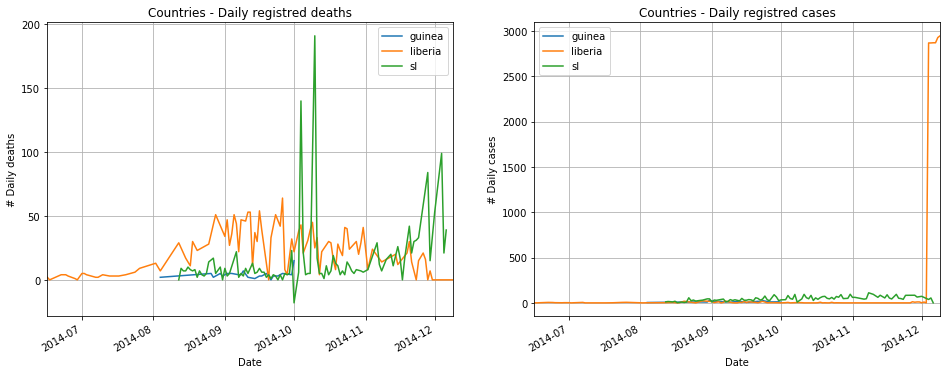

In [123]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(16,6))
for label, df in r.groupby('country'):
    df.plot(y='n_death', ax=ax, label=label)
for label, df in r.groupby('country'):
    df.plot(y='n_case', ax=ax2, label=label)
ax.grid(); ax2.grid()
ax.set_xlabel('Date'); ax2.set_xlabel('Date')
ax.set_ylabel('# Daily deaths'); ax2.set_ylabel('# Daily cases')
ax.set_title('Countries - Daily registred deaths'); ax2.set_title('Countries - Daily registred cases')
plt.legend()

Note that for Sierra Leon (sl), there is a number of registred death negative around early october. This is probably not due to the fact that people resuscitated. Below is a more detailed view of the problem. As one can observe, it can be, for example, a wrong reporting in the data.

In [201]:
r_sl.iloc[40:50]['death_confirmed']

date
2014-09-26    513
2014-09-27    518
2014-09-28    522
2014-09-29    527
2014-09-30    550
2014-10-01    532
2014-10-03    538
2014-10-04    678
2014-10-05    699
2014-10-06    703
Name: death_confirmed, dtype: object

In [130]:
r['n_case_tot'] = r['n_case'] +  r['n_case_un']
r['n_death_tot'] = r['n_death'] +  r['n_death_un']

r.groupby('country').sum()

,n_case,n_case_un,n_death,n_death_un,n_case_tot,n_death_tot
country,,,,,,
guinea,276.0,201.0,89.0,0.0,477.0,89.0
liberia,17660.0,32484.0,2038.0,0.0,50144.0,2038.0
sl,4378.0,3578.0,1444.0,0.0,7956.0,1444.0


In [157]:
COUNTRIES = ['guinea', 'liberia', 'sl']
ds = [(r[r['country']==COUNTRY].index[-1]-r[r['country']==COUNTRY].index[0]).days for COUNTRY in COUNTRIES]
print('Days spans: {}'.format(ds))
r.groupby('country').sum().divide(ds, axis=0)

Days spans: [58, 176, 116]


,n_case,n_case_un,n_death,n_death_un,n_case_tot,n_death_tot
country,,,,,,
guinea,4.758621,3.465517,1.534483,0.0,8.224138,1.534483
liberia,100.340909,184.568182,11.579545,0.0,284.909091,11.579545
sl,37.741379,30.844828,12.448276,0.0,68.586207,12.448276


## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

In [ ]:
# Write your answer here

## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [ ]:
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')

For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

In [ ]:
# Write your answer here